In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_df=pd.read_csv('adult.data')

In [13]:
raw_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,sal
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [16]:
raw_df.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','sal']

In [20]:
raw_df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
39                32560 non-null int64
 State-gov        32560 non-null object
 77516            32560 non-null int64
 Bachelors        32560 non-null object
 13               32560 non-null int64
 Never-married    32560 non-null object
 Adm-clerical     32560 non-null object
 Not-in-family    32560 non-null object
 White            32560 non-null object
 Male             32560 non-null object
 2174             32560 non-null int64
 0                32560 non-null int64
 40               32560 non-null int64
 United-States    32560 non-null object
 <=50K            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
for col in raw_df.columns:
    print (col, "\n", raw_df[col].value_counts(normalize=True).head(), "\n\n")
# unusual data in native_country , 1%

age 
 36    0.027580
31    0.027273
34    0.027211
23    0.026935
35    0.026904
Name: age, dtype: float64 


workclass 
  Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
Name: workclass, dtype: float64 


fnlwgt 
 123011    0.000399
203488    0.000399
164190    0.000399
121124    0.000369
148995    0.000369
Name: fnlwgt, dtype: float64 


education 
  HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
Name: education, dtype: float64 


education_num 
 9     0.322512
10    0.223925
13    0.164435
14    0.052918
11    0.042445
Name: education_num, dtype: float64 


marital_status 
  Married-civ-spouse    0.459951
 Never-married         0.328071
 Divorced              0.136456
 Separated             0.031480
 Widowed               0.030498
Name: marital_status, dtype: float64 


occupation 
  Prof-specialty     

In [30]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
raw_df['sal_greater50'] = lb_make.fit_transform(raw_df['sal'])
raw_df.drop(['sal','sal_greater50'],axis=1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,sal_greater50k
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


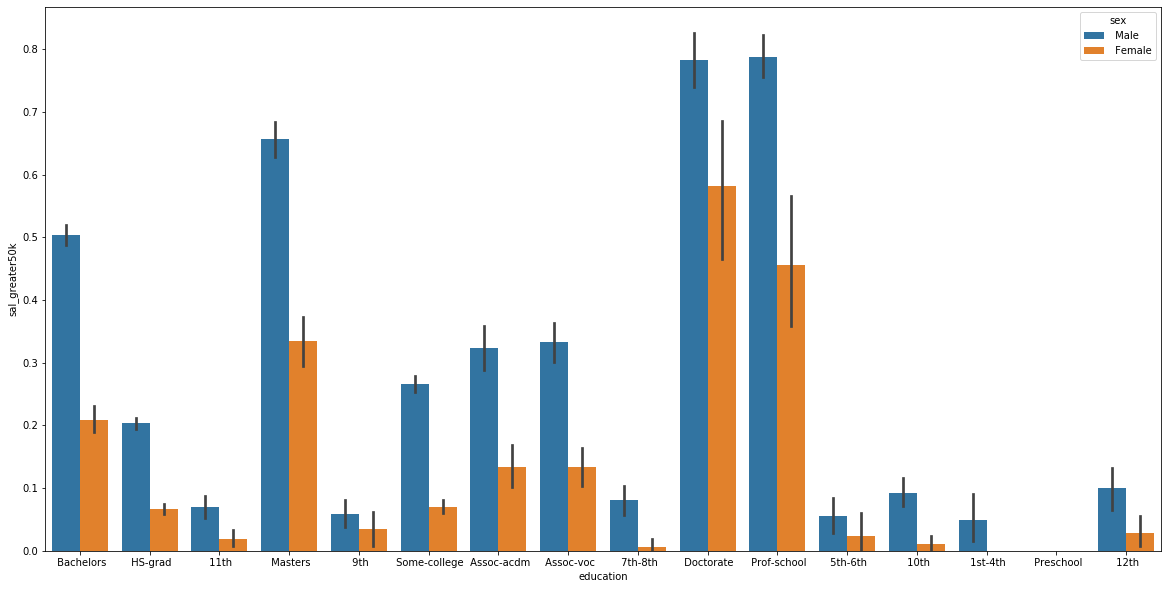

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='education',y='sal_greater50k',data=raw_df,hue='sex')



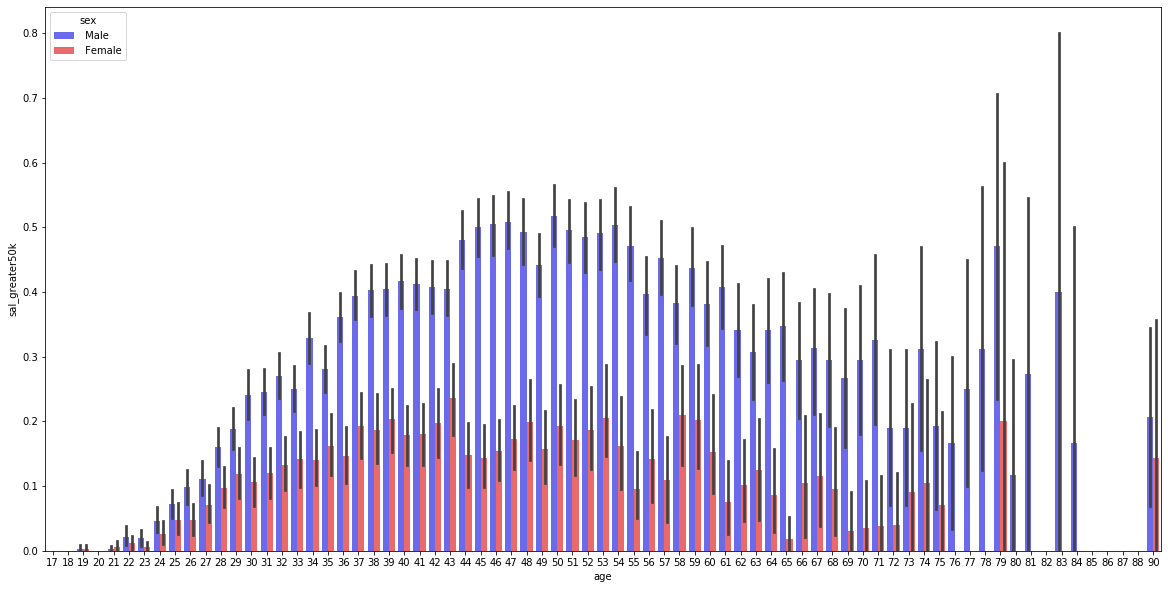

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(x='age',y='sal_greater50k',data=raw_df,hue='sex',palette='seismic')

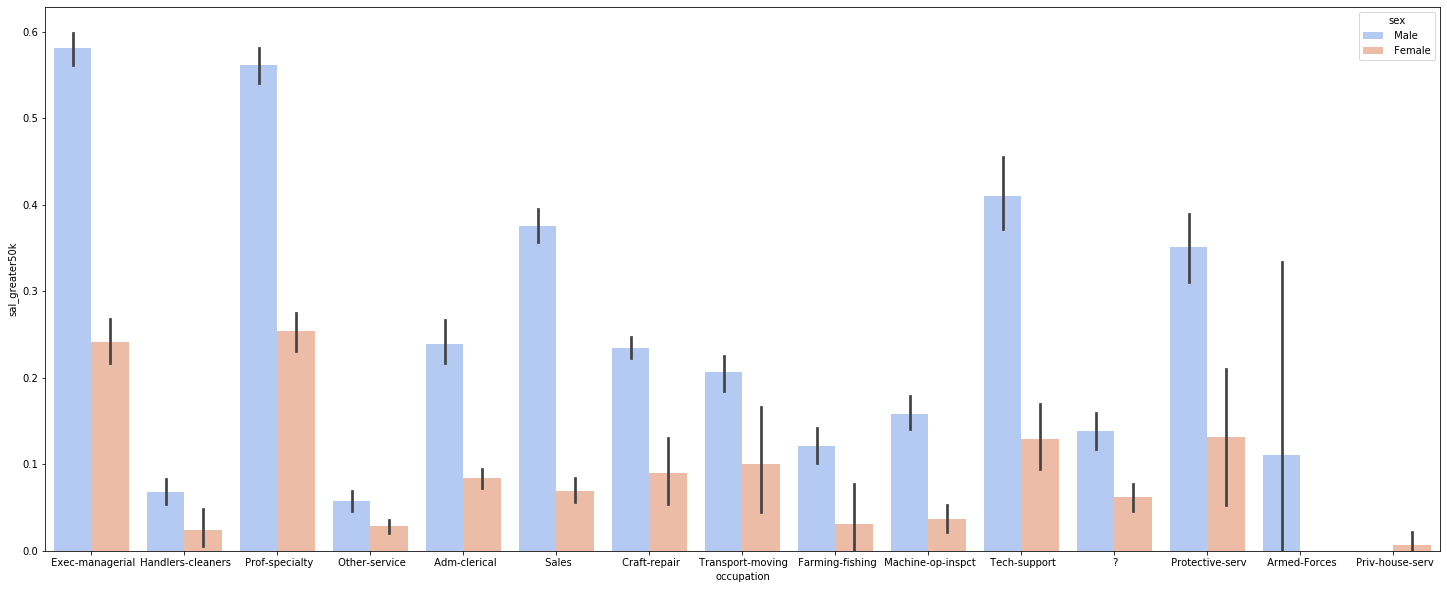

In [48]:
plt.figure(figsize=(25,10))
sns.barplot(x='occupation',y='sal_greater50k',data=raw_df,hue='sex',palette='coolwarm')

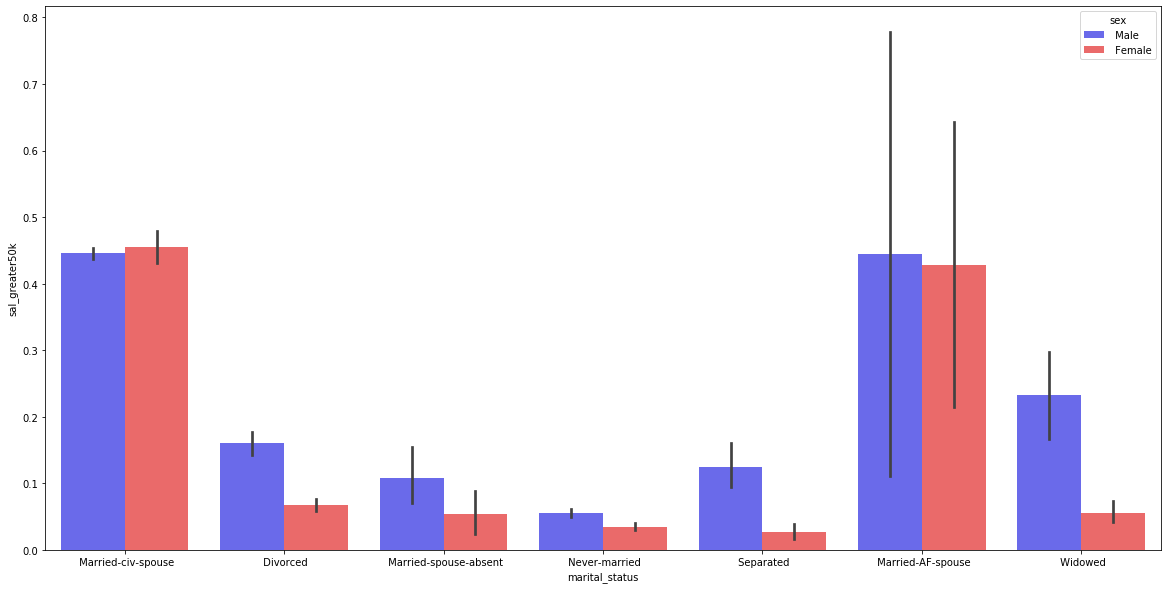

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(x='marital_status',y='sal_greater50k',data=raw_df,hue='sex',palette="seismic")

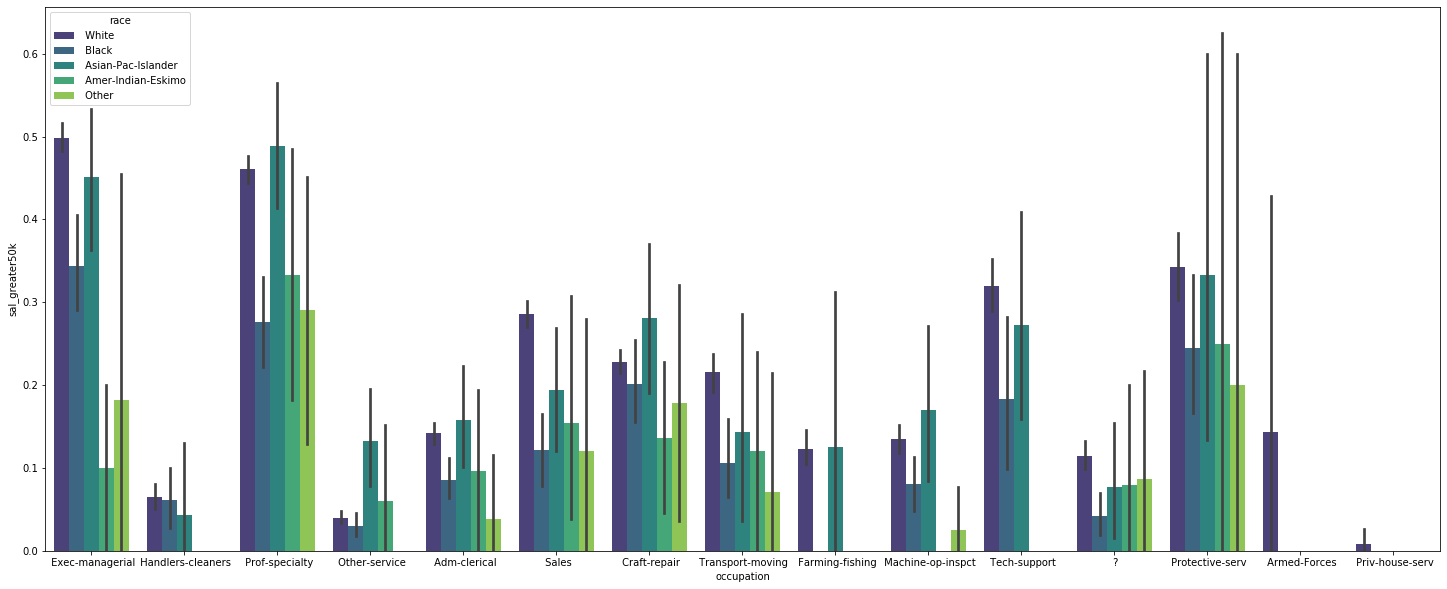

In [41]:
plt.figure(figsize=(25,10))
sns.barplot(x='occupation',y='sal_greater50k',data=raw_df,hue='race',palette='viridis')


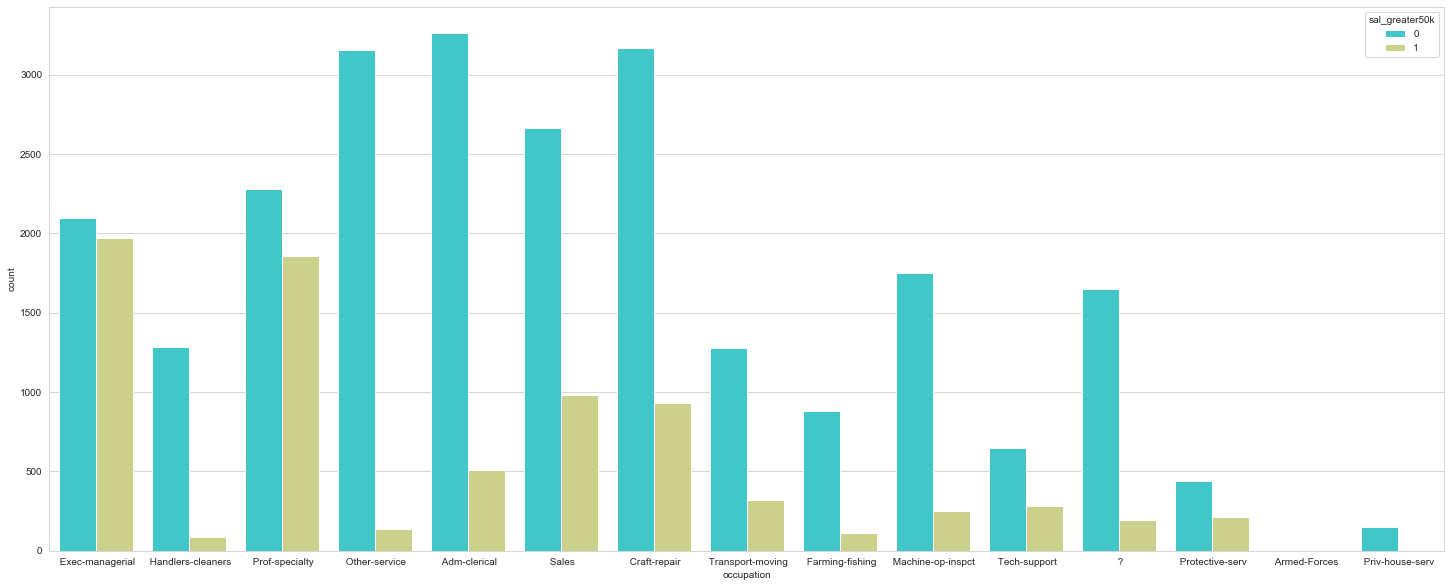

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,10))
sns.countplot(x='occupation',hue='sal_greater50k',data=raw_df,palette='rainbow')

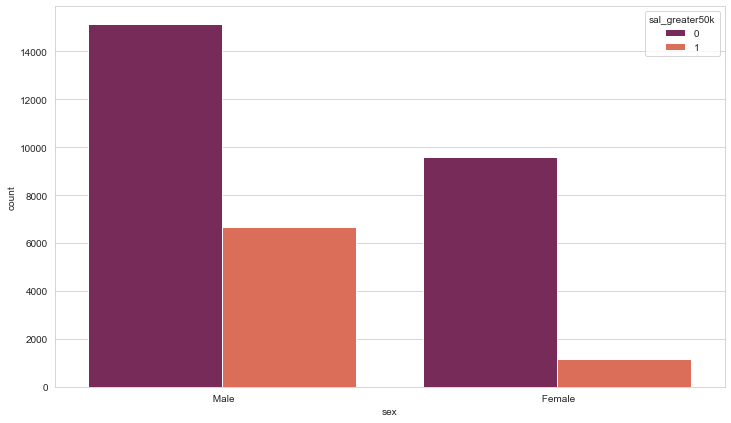

In [66]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.countplot(x='sex',hue='sal_greater50k',data=raw_df,palette='rocket')

Text(0.5, 0, 'age')

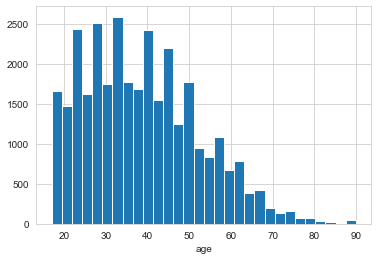

In [53]:
sns.set_style('whitegrid')
raw_df['age'].hist(bins=30)
plt.xlabel('age')


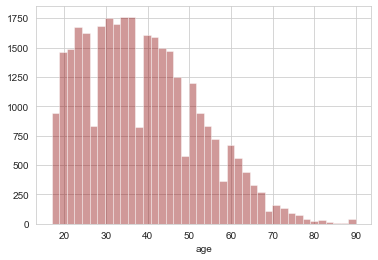

In [60]:
sns.distplot(raw_df['age'].dropna(),kde=False,color='darkred',bins=40)

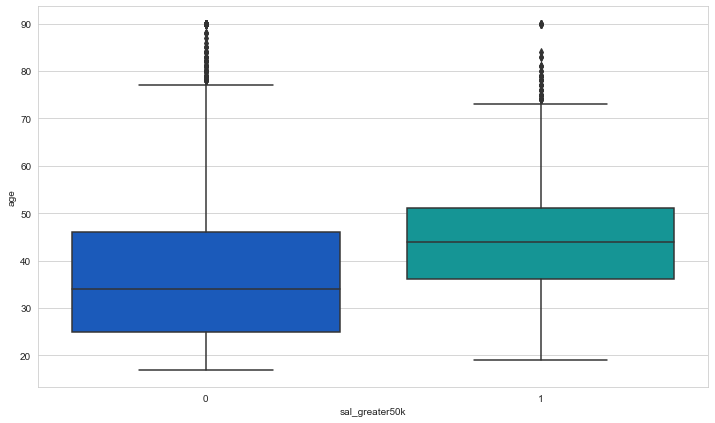

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='sal_greater50k',y='age',data=raw_df,palette='winter')

In [85]:
df=raw_df.copy()
df.drop(['education_num','fnlwgt','sal','sal_greater50'],axis=1,inplace=True)

In [86]:
# workclass=pd.get_dummies(df['workclass'],drop_first=True)
# education=pd.get_dummies(df['education'],drop_first=True)
# marital_status=pd.get_dummies(df['marital_status'],drop_first=True)

# occupation=pd.get_dummies(df['occupation'],drop_first=True)
# relationship=pd.get_dummies(df['relationship'],drop_first=True)
# race=pd.get_dummies(df['race'],drop_first=True)
# sex=pd.get_dummies(df['sex'],drop_first=True)
# native_country=pd.get_dummies(df['native_country'],drop_first=True)

df['workclass'] = lb_make.fit_transform(df['workclass'])
df['education'] = lb_make.fit_transform(df['education'])
df['marital_status'] = lb_make.fit_transform(df['marital_status'])
df['occupation'] = lb_make.fit_transform(df['occupation'])
df['relationship'] = lb_make.fit_transform(df['relationship'])
df['race'] = lb_make.fit_transform(df['race'])
df['sex'] = lb_make.fit_transform(df['sex'])
df['native_country'] = lb_make.fit_transform(df['native_country'])
                                     





In [87]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,sal_greater50k
0,50,6,9,2,4,0,4,1,0,0,13,39,0
1,38,4,11,0,6,1,4,1,0,0,40,39,0
2,53,4,1,2,6,0,2,1,0,0,40,39,0
3,28,4,9,2,10,5,2,0,0,0,40,5,0
4,37,4,12,2,4,5,4,0,0,0,40,39,0


In [88]:
y=df['sal_greater50k']
X=df.drop(['sal_greater50k'],axis=1)


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)